### Imports

In [1]:
## import essential modules 
import qumcmc 
from qumcmc.basic_utils import *
from qumcmc.energy_models import *
from qumcmc.classical_mcmc_routines import *
from qumcmc.quantum_mcmc_routines_qulacs import *     #for Qulacs Simulator backend
# from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 
from typing import Union
from qumcmc.trajectory_processing import *
from qumcmc.training import *

import seaborn as sns
import pandas as pd
#############
import random
from qulacs import QuantumState
from qulacs_core import DensityMatrix

from qiskit.visualization import plot_histogram

def int_to_str(state_obtained, nspin):
    return f"{state_obtained:0{nspin}b}"

In [2]:
def run_sampling_task(nspin, seed, beta, steps):
    
    model = random_ising_model(nspin, seed, print_model=False)
    model_ems =Exact_Sampling(model, beta= beta)
    initial = model_ems.boltzmann_pd.get_sample(1)[0]
    ## run mcmc ##
    clchain =classical_mcmc(
        n_hops=steps,
        model=model,
        temperature=1/beta,
        initial_state=initial
    )
    qchain =quantum_enhanced_mcmc(
        n_hops=steps,
        model=model,
        temperature=1/beta,
        initial_state=initial
    )
    ## save data ##
    trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
    trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
    trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})

    return trajectory_data


### **CHECKS ON SCALING OF quMCMC CONVERGENCE**

### **5 Qubits**

In [2]:
DATA_5qubit = {}

##### Exp: 1

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 16
Entropy : None
---------------------------------------------


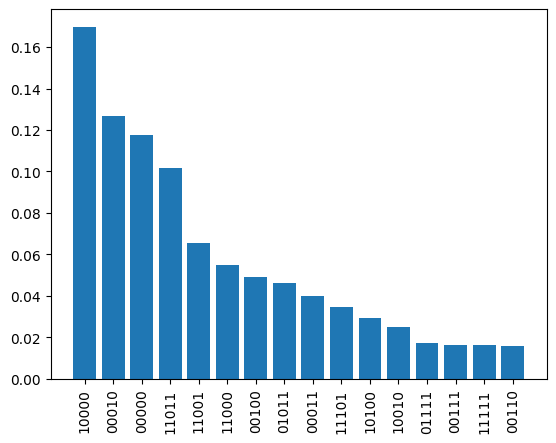

In [3]:
## initialisation ##
seed = 23564
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()
steps = 2000; initial = model_ems.boltzmann_pd.get_sample(1)[0]


In [ ]:
## run mcmc ##
clchain =classical_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
qchain =quantum_enhanced_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
## save data ##
trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
DATA_5qubit[1] = trajectory_data

#### Exp 2

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 18
Entropy : None
---------------------------------------------


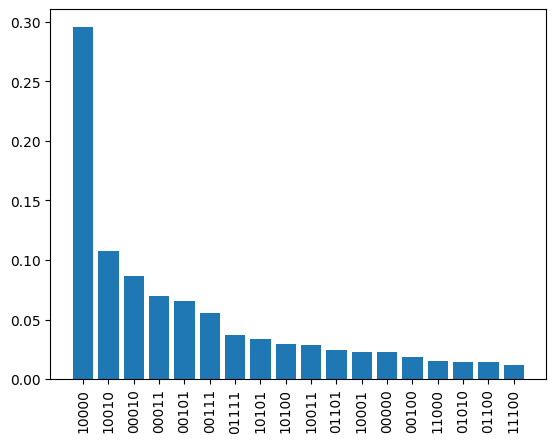

In [5]:
## initialisation ##
seed = 202687
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()
steps = 2000; initial = model_ems.boltzmann_pd.get_sample(1)[0]

In [6]:
## run mcmc ##
clchain =classical_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
qchain =quantum_enhanced_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
## save data ##
trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
DATA_5qubit[2] = trajectory_data

#### Exp 3

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 14
Entropy : None
---------------------------------------------


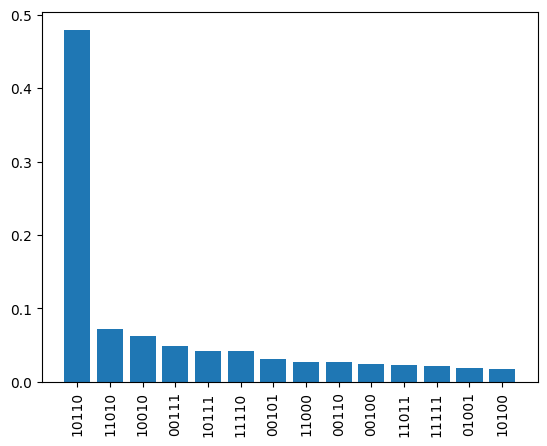

In [7]:
## initialisation ##
seed = 142410
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()
steps = 2000; initial = model_ems.boltzmann_pd.get_sample(1)[0]


In [8]:

## run mcmc ##
clchain =classical_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
qchain =quantum_enhanced_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
## save data ##
trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
DATA_5qubit[3] = trajectory_data

#### Exp 4

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 20
Entropy : None
---------------------------------------------


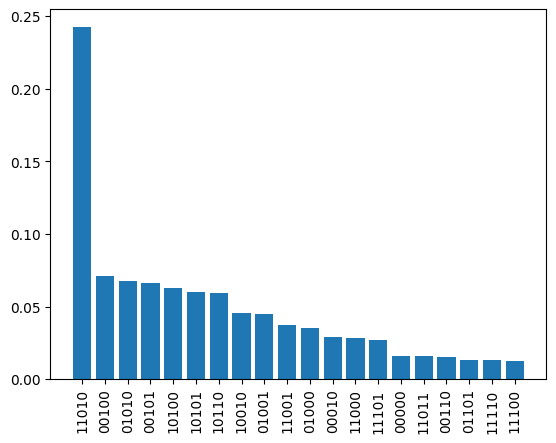

In [9]:
## initialisation ##
seed = 156407
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()
steps = 2000; initial = model_ems.boltzmann_pd.get_sample(1)[0]

In [10]:
## run mcmc ##
clchain =classical_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
qchain =quantum_enhanced_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
## save data ##
trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
DATA_5qubit[4] = trajectory_data

#### Exp 5

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 19
Entropy : None
---------------------------------------------


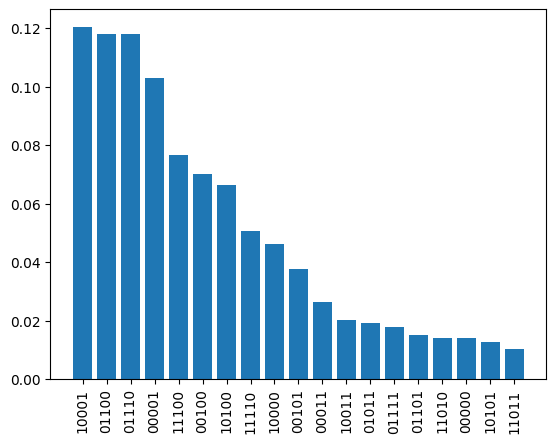

In [11]:
## initialisation ##
seed = 501064
model = random_ising_model(5, seed, print_model=False); beta = 1.0134
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()
steps = 2000; initial = model_ems.boltzmann_pd.get_sample(1)[0]

In [12]:
## run mcmc ##
clchain =classical_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
qchain =quantum_enhanced_mcmc(
    n_hops=steps,
    model=model,
    temperature=1/beta,
    initial_state=initial
)
## save data ##
trajectory_data = {};trajectory_data['model_seed'] = seed; trajectory_data['beta'] = beta
trajectory_data['classical'] = get_trajectory_statistics(clchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
trajectory_data['quantum'] =  get_trajectory_statistics(qchain, model_ems, to_observe={'acceptance_prob', 'kldiv'})
DATA_5qubit[5] = trajectory_data

#### Data

In [14]:
DATA_5qubit = pd.DataFrame(DATA_5qubit)
DATA_5qubit.to_json("SamplingData/DATA_5qubit.json")

### **10 Qubits**

In [3]:
nspin =10; DATA_10qubit = {}

#### Experiments

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 23
Entropy : 6.326564594091135
---------------------------------------------


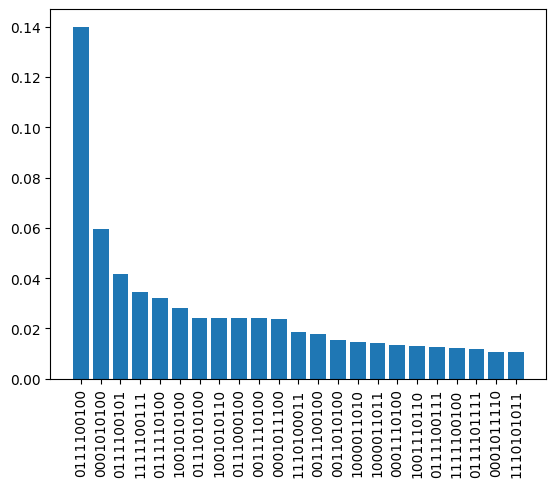

In [4]:
## initialisation ##
seed = 23564; beta = 1.0134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 16
Entropy : 5.393304943832459
---------------------------------------------


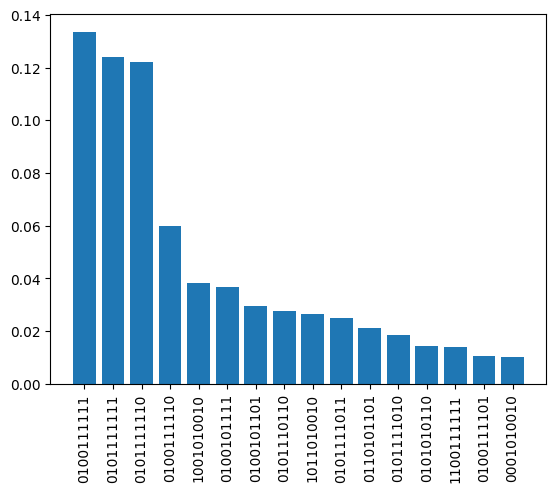

In [5]:
## initialisation ##
seed = 178064; beta = 1.0134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.0134
Num Most Probable States : 18
Entropy : 5.7121849389323245
---------------------------------------------


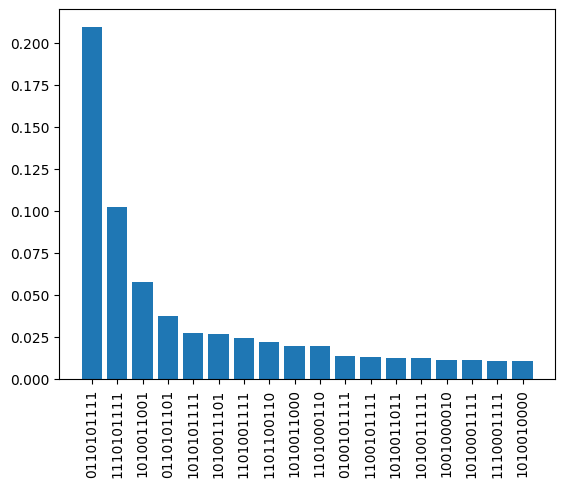

In [6]:
## initialisation ##
seed = 32164; beta = 1.0134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.5634
Num Most Probable States : 21
Entropy : 4.3752934323201105
---------------------------------------------


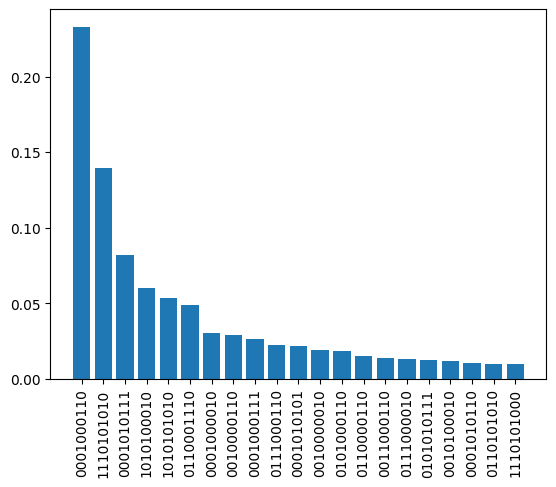

In [7]:
## initialisation ##
seed = 143264; beta = 1.5634
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

     MODEL : param_model |  beta : 1.12134
Num Most Probable States : 21
Entropy : 5.220367383148227
---------------------------------------------


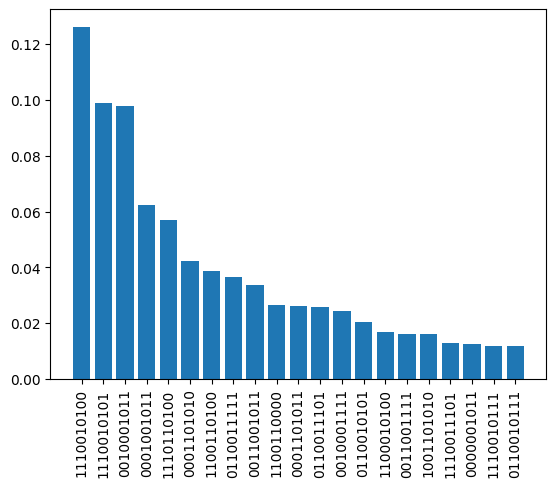

In [8]:
## initialisation ##
seed = 13164; beta = 1.12134
model = random_ising_model(nspin, seed, print_model=False)
model_ems =Exact_Sampling(model, beta= beta);
model_ems.sampling_summary()

#### DATA

In [9]:
seeds = [23564,178064,32164,143264,13164]
betas = [1.0134,1.0134,1.0134,1.5634,1.12134]

In [11]:
DATA_10qubit = {}; iter = 0
for seed, beta in tqdm(zip(seeds, betas)):
    iter += 1
    tdata = run_sampling_task(nspin, seed, beta, 5000)
    DATA_10qubit[iter] = tdata

5it [04:08, 49.78s/it]


In [12]:
DATA_10qubit = pd.DataFrame(DATA_10qubit)
DATA_10qubit.to_json("SamplingData/DATA_10qubit.json")